## Linear Regression W/ Tensorflow

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import numpy as np

from numpy import genfromtxt
from sklearn.datasets import load_boston

E:\Users\micah\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#just some helper functions
def feature_normalize(dataset):
    mu = np.mean(dataset,axis=0)
    sigma = np.std(dataset,axis=0)
    return (dataset - mu)/sigma

def append_bias_reshape(features,labels):
    n_training_samples = features.shape[0]
    n_dim = features.shape[1]
    f = np.reshape(np.c_[np.ones(n_training_samples),features],[n_training_samples,n_dim + 1])
    l = np.reshape(labels,[n_training_samples,1])
    return f, l

# Step 1: Read in the Data

In [15]:
#can also read in using pandas or other packages to read csv, tsv, ..etc
boston = load_boston()
features = np.array(boston.data)
labels = np.array(boston.target)

In [16]:
#normalizing features is important, helps deal with outliers
normalized_features = feature_normalize(features)
f, l = append_bias_reshape(normalized_features,labels)
n_dim = f.shape[1]

# Step 2: Define Placeholders

In [17]:
X = tf.placeholder(tf.float32,[None,n_dim])
Y = tf.placeholder(tf.float32,[None,1])
W = tf.Variable(tf.ones([n_dim,1]))

# Step 3: Define Variables for Each Layer

In [18]:
#can do it manually or...
init = ...
#hint: an Op that initializes all variables

# Step 5: Loss Function

In [19]:
#try altering learning rate and epochs and see what happens
learning_rate = 0.01
training_epochs = 1000
cost_history = np.empty(shape=[1],dtype=float)

y_ = tf.matmul(X, W)
#lets try least squares to measure our cost (y_ - Y)
cost = ...

# Step 6: Define Optimizer

In [ ]:
#lets use gradient descent optimizer
training_step = tf.train.(..)

# Step 7: Create a Session

In [9]:
#create a session
sess = ...
sess.run(init)

# Step 8: Train the Model

In [10]:
#splitting our data into 80% train and 20% test
rnd_indices = np.random.rand(len(f)) < 0.80

train_x = f[rnd_indices]
train_y = l[rnd_indices]
test_x = f[~rnd_indices]
test_y = l[~rnd_indices]

for epoch in range(training_epochs):
    #evaluate training_step on the training data aka run the session
    ...
    cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: train_x,Y: train_y}))

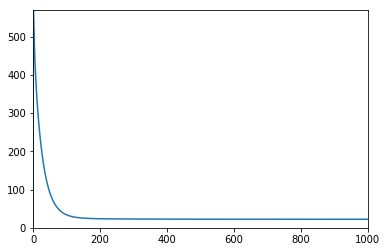

In [11]:
#visualizing loss
plt.plot(range(len(cost_history)),cost_history)
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()

# Step 9: Test the Model

MSE: 22.1884


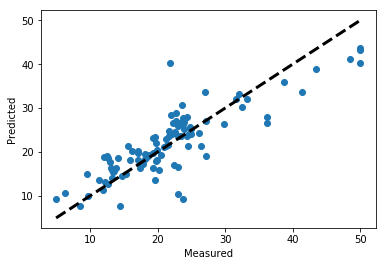

In [12]:
pred_y = sess.run(y_, feed_dict={X: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print("MSE: %.4f" % sess.run(mse)) 

fig, ax = plt.subplots()
ax.scatter(test_y, pred_y)
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()